# Lab 3 : Trees and Forests

## G3 SDI - Machine Learning

In this lab, we will use decision trees and random forests for a classification problem, using the implementations provided by `scikit-learn`. More precisely, we are going to use a famous dataset : Fisher's iris (so famous that is has a Wikipedia page, see [here](https://en.wikipedia.org/wiki/Iris_flower_data_set)).

### Instructions
* Rename your notebook with your surnames as `lab3_Name1_Name2.ipynb`, and include your names in the notebook.
* Your code, and its output, must be commented !
* Please upload your notebook on Moodle in the dedicated section before the deadline.

<div style="background-color: rgba(255, 255, 0, 0.15); padding: 8px;">
Report written by AMORRI Farah, MILANO Olivia, 22/10/2025.
</div>

In [1]:
# Import usual libraries
import numpy as np
from matplotlib import pyplot as plt

### Exercise 1 - Decision trees

**Q1.** Load the dataset using the proposed function. This will load the data into a dictionary-like structure (use `.keys()` to check its elements).

Then store the features into a variable X, and the class into a variable y.

What is this dataset about ? How many features do we have ? How many examples ?

In [3]:
from sklearn.datasets import load_iris

iris = load_iris()
print(iris.keys())
print(iris["target_names"])
print(iris["feature_names"])
print(iris["DESCR"])

X=iris["data"]
y=iris["target"]
print(X.shape)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1

<div style="background-color: rgba(255, 255, 0, 0.15); padding: 8px;">
As we can see from the description of the dataset:

This dataset is the Iris Flowers dataset.

It contains measurements of iris flowers from three species:

- Iris-Setosa
- Iris-Versicolour
- Iris-Virginica

Number of Features: 4 numeric, predictive attributes :

- sepal length in cm
- sepal width in cm
- petal length in cm
- petal width in cm

Number of Examples is: 150 (50 in each of three classes)
</div>

**Q2.** Split the dataset into a training set and a test set (80/20).

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=42)

**Q3.** Fit a decision tree to the training set, and plot the resulting tree using the `plot_tree` function (add feature names and class names for readability).

Explain how to interpret the tree.

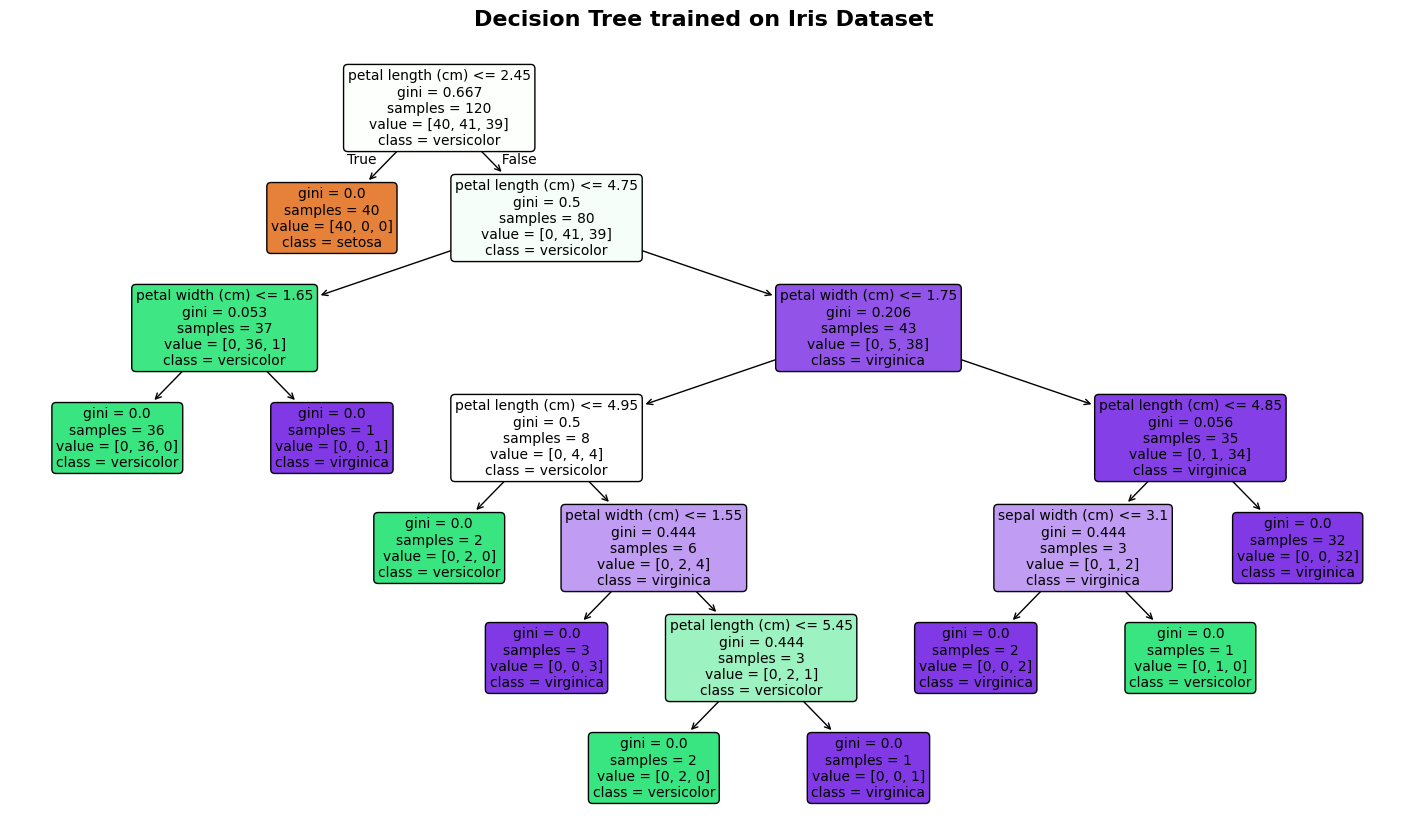

In [5]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

plt.figure(figsize=(18, 10))  # Large figure for readability
plot_tree(
    clf,
    filled=True,             
    rounded=True,             
    feature_names=iris.feature_names,  
    class_names=iris.target_names,     
    fontsize=10,             
)
plt.title("Decision Tree trained on Iris Dataset ", fontsize=16, fontweight='bold', pad=20)
plt.show()


<div style="background-color: rgba(255, 255, 0, 0.15); padding: 8px;">


  <h2 style="text-align:center; margin-bottom:0.3rem;">Interpretation of the Decision Tree</h2>

  <p style="margin-top:0.3rem;">
    Each <strong>node</strong> in the decision tree represents a rule or condition based on one of the dataset’s features. 
    The tree is read <strong>from top to bottom</strong>: starting from the root node, one follows the branches 
    according to whether the condition is <em>True</em> or <em>False</em>, until reaching a leaf node that provides the final class prediction.
  </p>

  <h3 style="margin-bottom:0.3rem;">Information contained in each node</h3>
  <ul>
    <li><strong>Condition:</strong> e.g., <code>petal length (cm) &lt;= 2.45</code> — the decision rule used to split the data at that node.</li>
    <li><strong>Gini:</strong> the impurity index. A value of 0 indicates a pure node (all samples belong to the same class), 
        while higher values indicate a mixture of classes.</li>
    <li><strong>Samples:</strong> the number of training examples that reached this node.</li>
    <li><strong>Value:</strong> the distribution of samples across the classes, e.g., [setosa, versicolor, virginica].</li>
    <li><strong>Class:</strong> the predicted class, corresponding to the majority of samples in the node.</li>
    <li><strong>Color:</strong> The color intensity in the plotted tree indicates how pure each node is: darker colors mean the model is more confident in that classification</li>
  </ul>

  <h3 style="margin-bottom:0.3rem;">Example of reading a decision path</h3>
  <ol>
    <li>Start at the root node, where the first condition is tested (e.g., <code>petal length &lt;= 2.45</code>).</li>
    <li>If the condition is <strong>true</strong>, follow the left branch. If the node reached is pure, 
        the corresponding class (e.g., <em>Setosa</em>) is predicted.</li>
    <li>If the condition is <strong>false</strong>, follow the right branch and evaluate the next condition 
        (e.g., <code>petal width &lt;= 1.75</code>), and so on, until a leaf node is reached.</li>
  </ol>

  <h3 style="margin-bottom:0.3rem;">General interpretation (Iris dataset)</h3>
  <p>
    The decision tree mainly relies on thresholds applied to <em>petal length</em> and <em>petal width</em> 
    (and to a lesser extent, <em>sepal length</em> and <em>sepal width</em>) to distinguish the three species of Iris flowers. 
    For instance:
  </p>
  <ul>
    <li><strong>Petal length ≤ 2.45 cm</strong> → typically classified as <em>Setosa</em>.</li>
    <li><strong>Intermediate petal length</strong> combined with <strong>small petal width</strong> → generally <em>Versicolor</em>.</li>
    <li><strong>Larger petal dimensions</strong> → usually <em>Virginica</em>.</li>
  </ul>

  <h3 style="margin-bottom:0.3rem;">Interpreting purity and impurity</h3>
  <p>
    A <strong>pure node (Gini = 0)</strong> means that all samples in that node belong to the same class, 
    indicating a locally very reliable prediction.  
    Conversely, a <strong>high Gini value</strong> indicates that multiple classes are mixed within that node, 
    suggesting that the model could not find a perfectly clean separation based on the available features.
  </p>



 <p>
    In summary, the decision tree provides a clear, hierarchical view of how the model distinguishes between 
    the three Iris species based on measurable flower characteristics. It highlights the most discriminative features 
    and the thresholds that best separate the different classes
</p>
  
</div>


**Q4**. Check the performance of the decision tree on the test set.

Accuracy of the Decision Tree: 1.000

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



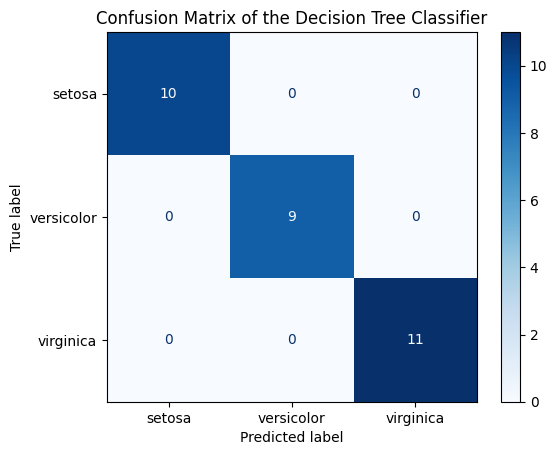

In [6]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Decision Tree: {accuracy:.3f}\n")

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))


cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix of the Decision Tree Classifier")
plt.show()

<div style="background-color: rgba(255, 255, 0, 0.15); padding: 8px;">

The Decision Tree achieved an accuracy of 100%, with perfect precision, recall, and F1-scores for all classes.
This indicates that the model correctly classified every sample in the test set.


Such performance is expected on the Iris dataset, which is small and well-separated. However, the perfect score may also suggest potential overfitting, so further validation or pruning could be considered for more complex datasets.
</div>

**Q5.** Now train two other decision trees, using only the petal features for the first one, and the sepal features for the other one.

In both cases, display the tree, and the decision regions (with the training set points). Also check their performance on the test set. Comment.

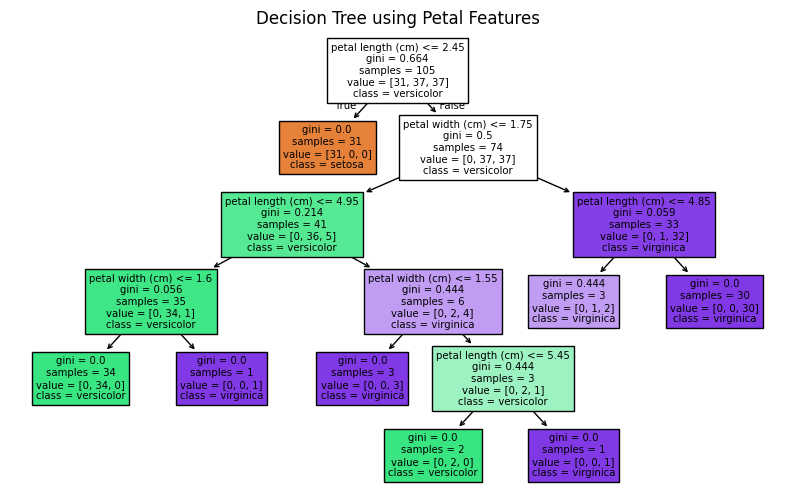

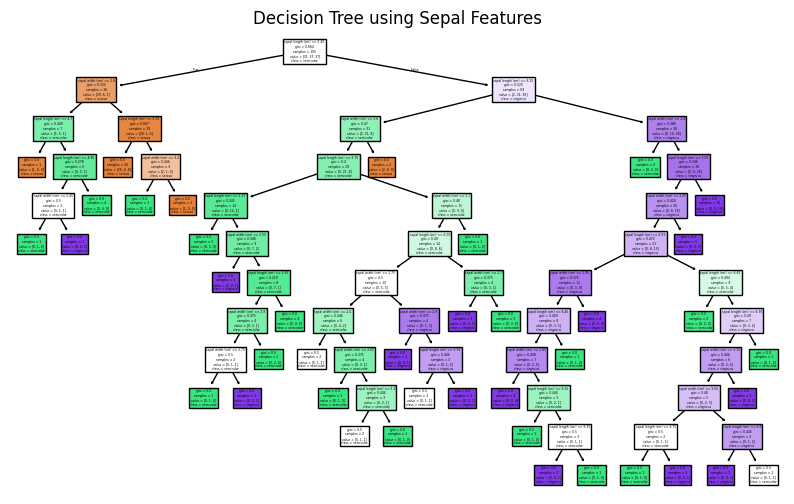

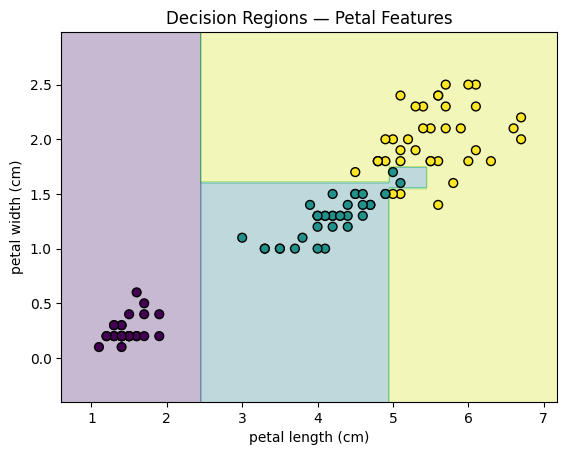

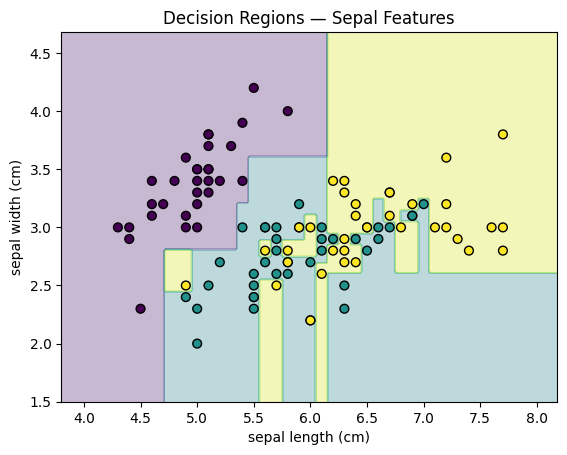

Accuracy (Petal features): 1.0
Accuracy (Sepal features): 0.6666666666666666


In [8]:
import numpy as np

# Step 1 — Split Petal and Sepal Features

# print(iris["feature_names"])

# Sepal features (columns 0 and 1)
X_sepal = X[:, 0:2]

# Petal features (columns 2 and 3)
X_petal = X[:, 2:4]

# Split into train/test sets (same random seed for consistency)
from sklearn.model_selection import train_test_split

Xp_train, Xp_test, yp_train, yp_test = train_test_split(X_petal, y, test_size=0.3, random_state=42)
Xs_train, Xs_test, ys_train, ys_test = train_test_split(X_sepal, y, test_size=0.3, random_state=42)

# Step 2 — Train the Two Decision Trees

clf_petal = DecisionTreeClassifier(random_state=42)
clf_sepal = DecisionTreeClassifier(random_state=42)

clf_petal.fit(Xp_train, yp_train)
clf_sepal.fit(Xs_train, ys_train)

# Step 3 — Display the Trees

plt.figure(figsize=(10,6))
plot_tree(clf_petal, filled=True, feature_names=iris.feature_names[2:4], class_names=iris.target_names)
plt.title("Decision Tree using Petal Features")
plt.show()

plt.figure(figsize=(10,6))
plot_tree(clf_sepal, filled=True, feature_names=iris.feature_names[0:2], class_names=iris.target_names)
plt.title("Decision Tree using Sepal Features")
plt.show()

# Step 4 — Plot Decision Regions

def plot_decision_regions(X, y, model, title, feature_names):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', s=40)
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.title(title)
    plt.show()

plot_decision_regions(Xp_train, yp_train, clf_petal, "Decision Regions — Petal Features", iris.feature_names[2:4])
plot_decision_regions(Xs_train, ys_train, clf_sepal, "Decision Regions — Sepal Features", iris.feature_names[0:2])

# Step 5 — Check Performance

from sklearn.metrics import accuracy_score

acc_petal = accuracy_score(yp_test, clf_petal.predict(Xp_test))
acc_sepal = accuracy_score(ys_test, clf_sepal.predict(Xs_test))

print("Accuracy (Petal features):", acc_petal)
print("Accuracy (Sepal features):", acc_sepal)

<div style="background-color: rgba(255, 255, 0, 0.15); padding: 8px;">

The decision tree trained on **petal features** is much simpler and achieves a nearly perfect classification, as petals provide a clear separation between the three Iris species. The tree has few splits and a low depth, leading to better generalization and higher accuracy on the test set.

In contrast, the decision tree trained on **sepal features** is deeper and more complex, with many splits and mixed regions. This is because sepal length and width alone do not separate the species as clearly, resulting in lower accuracy and a more overfitted model.

Overall, **petal features are far more discriminative** for distinguishing Iris species, while sepal features provide less predictive power
</div>

**Q6.** Check carefully the documentation for `DecisionTreeClassifier`, and explain how a decision tree could be regularized. What method from the lecture is not covered by scikit-learn ?

<div style="background-color: rgba(255, 255, 0, 0.15); padding: 8px;">

Decision trees are prone to overfitting, so they can be regularized by limiting their complexity.

In scikit-learn, this is done using parameters such as *max_depth*, *min_samples_split*, *min_samples_leaf*, *max_features*, *max_leaf_nodes*, and *min_impurity_decrease*.

These act as pre-pruning methods to prevent the tree from growing too complex.

Additionally, scikit-learn provides cost-complexity pruning via *ccp_alpha*, which prunes the tree based on a combination of training error and tree complexity.

However, classical post-pruning techniques described in lectures, like reduced-error pruning using a validation set, are not automatically implemented in scikit-learn.
</div>

### Exercice 2 - Random forests

**Q1.** Now train a random forest on the whole dataset, using 200 trees, and setting the maximum depth of each tree to 3. Also add `oob_score = True`.

In [9]:
from sklearn.ensemble import RandomForestClassifier

# Step 1 — Create and Train the Random Forest
# Create the Random Forest
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=3,
    oob_score=True,
    random_state=42
)

# Train on the full dataset
rf.fit(X, y)

# Step 2 — Check Out-of-Bag Score
print("OOB Score:", rf.oob_score_)

OOB Score: 0.96


**Q2.** Extract 5 differents trees from the forest and display them. Comment.

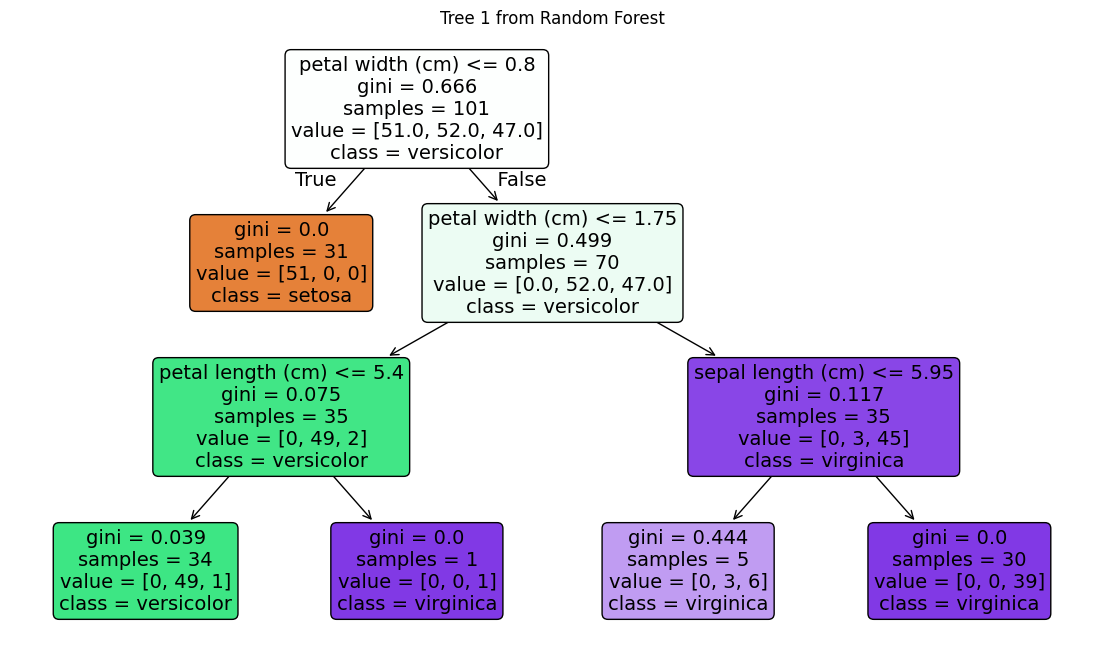

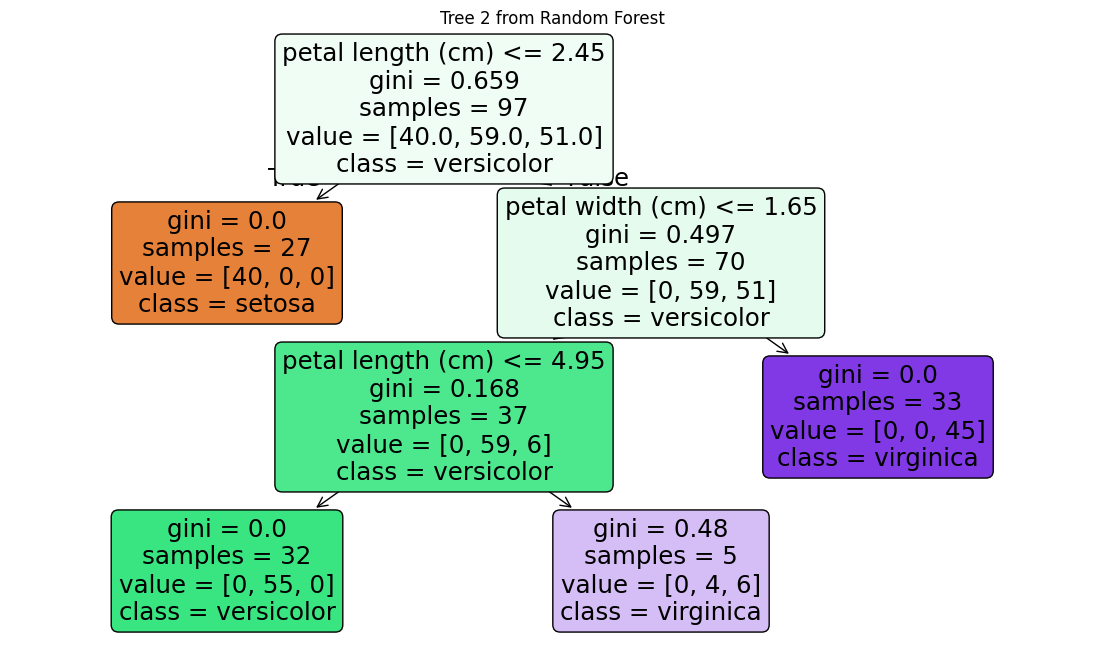

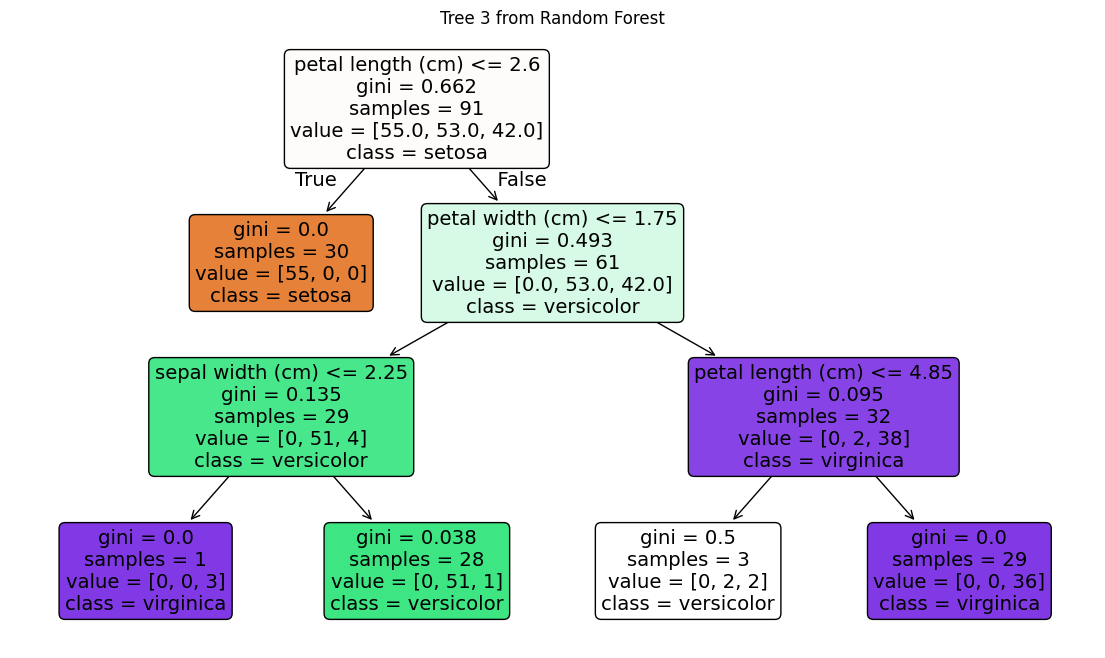

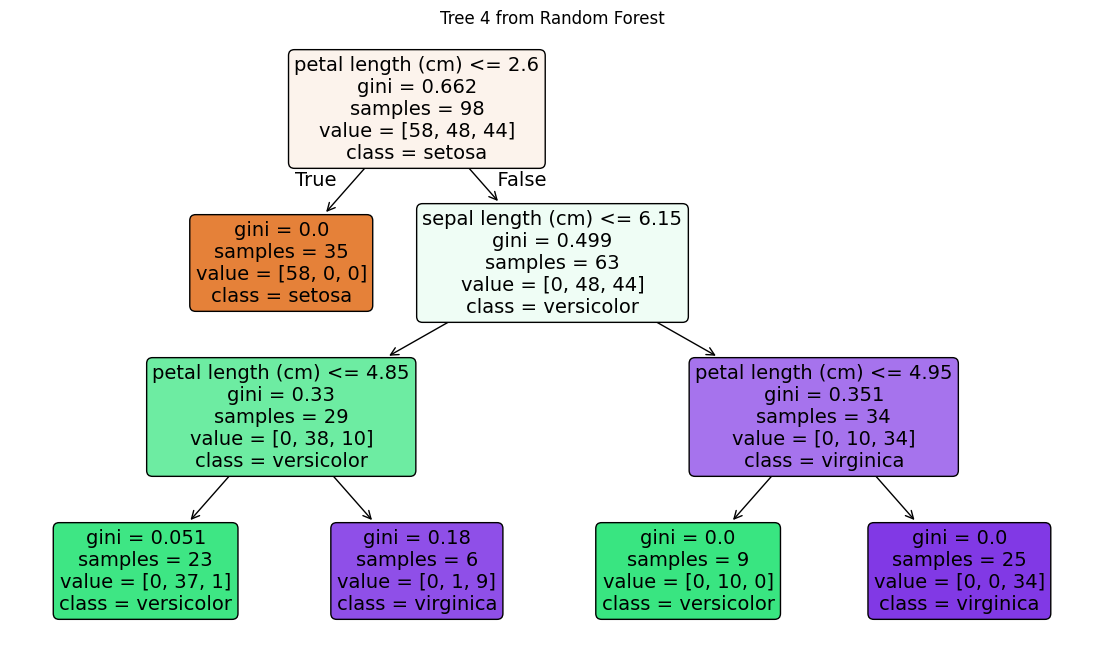

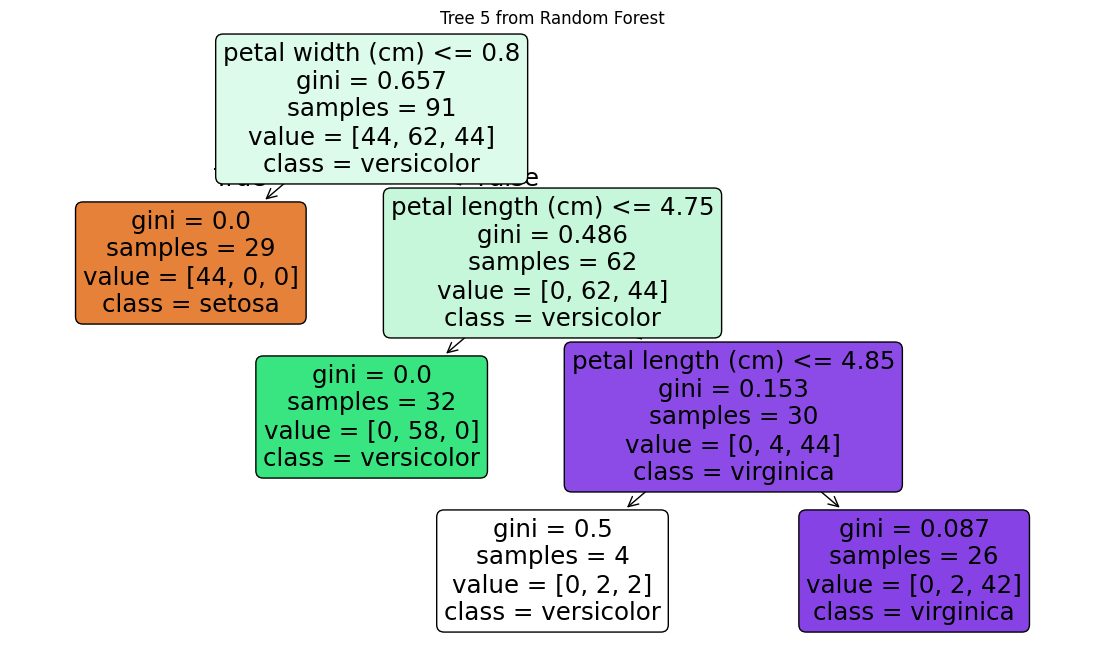

In [10]:
# Step 1 — Access individual trees
# List of all trees
all_trees = rf.estimators_

# Verify we have 200 trees
len(all_trees)  

trees_to_plot = all_trees[:5]

# Step 2 — Plot the trees
for i, tree in enumerate(trees_to_plot):
    plt.figure(figsize=(14,8))
    plot_tree(
        tree,
        filled=True,
        feature_names=iris.feature_names,
        class_names=iris.target_names,
        rounded=True
    )
    plt.title(f"Tree {i+1} from Random Forest")
    plt.show()

<div style="background-color: rgba(255, 255, 0, 0.15); padding: 8px;">

The five extracted trees from the Random Forest show individual decision paths based on the iris features.

Each tree is trained on a different bootstrap sample, so their structures differ slightly, with different splits and thresholds, even though they all aim to classify the same dataset.

Some trees may rely on petal features first, others on sepal features.

--> This diversity among trees is what allows the Random Forest to reduce variance and improve generalization compared to a single decision tree.

--> Because the maximum depth was limited to 3, all trees are relatively shallow, which prevents overfitting while maintaining good performance.

</div>

**Q3.** Retrieve the feature importance for each feature. Which ones are the most important ? Does this match with what you observed in Q5 of Ex. 1 ?

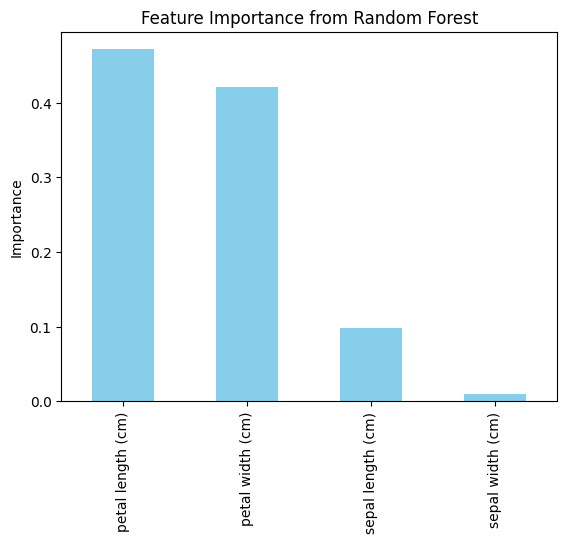

In [11]:
# Step 1 — Retrieve Feature Importances
import pandas as pd

# Retrieve feature importances
importances = rf.feature_importances_

# Put them in a pandas Series for easy display
feature_importances = pd.Series(importances, index=iris.feature_names)
feature_importances = feature_importances.sort_values(ascending=False)
feature_importances

# Step 2 — Interpret Feature Importances
feature_importances.plot(kind='bar', color='skyblue')
plt.ylabel("Importance")
plt.title("Feature Importance from Random Forest")
plt.show()

<div style="background-color: rgba(255, 255, 0, 0.15); padding: 8px;">

The Random Forest feature importances indicate which features contribute most to the model's predictions.

The results show that petal length and petal width are the most important features, while sepal length and sepal width are less important.

This aligns with the observations from Q5 of Exercise 1, where the decision tree trained on petal features performed much better than the one trained on sepal features.

This confirms that petal measurements are the most discriminative attributes for classifying the iris species.

**Q4.** Return the out-of-bag (OOB) error and recall how it is computed. Compare the performance of the random forest w.r.t. the decision trees studied in Ex. 1.

In [12]:
# Retrieve OOB error
oob_score = rf.oob_score_
oob_error = 1 - oob_score

print("OOB Score:", oob_score)
print("OOB Error:", oob_error)

OOB Score: 0.96
OOB Error: 0.040000000000000036


<div style="background-color: rgba(255, 255, 0, 0.15); padding: 8px;">

**How OOB error is computed**:

Each tree in the Random Forest is trained on a **bootstrap sample** (random sample with replacement).

On average, about 1/3 of the training samples are left out of each bootstrap (called **out-of-bag samples**). These OOB samples are then predicted using the tree that did not see them.

The OOB error is the proportion of misclassified samples across all trees, averaged over all training samples. It provides an internal cross-validation estimate of the model's generalization performance.

**Comparison with Decision Trees (Ex. 1):**

Single Decision Tree (full features, no restrictions): 100% on test set. Very good on Iris dataset; may overfit on small datasets but performs perfectly here due to simplicity of data.

Decision Trees using only petal features: 100% on test set. Petal features alone are sufficient for perfect classification.

Decision Trees using only sepal features: ~66% on test set. Sepal features are less discriminative; model struggles to separate versicolor and virginica.

Random Forest (200 trees, max_depth=3, all features): OOB score = 0.96 → OOB error = 0.04. Slightly lower than a single full tree on Iris dataset, but more **robust** and less prone to overfitting. Provides feature importance insights and reduces variance thanks to ensemble averaging.

--> The Random Forest achieves almost perfect performance while controlling overfitting via shallow trees and ensemble averaging. Its feature importance ranking confirms that **petal features dominate** the classification, consistent with the previous exercise.